ROM KAGGLE 
Palmer Archipelago (Antarctica) penguin data

The data folder contains two CSV files. 

penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

species: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex


Meet the penguins:
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

Goal is to produce a model able to classify the penguins into three different species.

This is to get a overview of the data. Use some cleaning, processing, and feature selection. 
We will use data exploration and visualization as well to see how data is distributed 
Encode and normalize the data 


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Part 1: Data exploration 

In [26]:
#loading the data which is in the same folder notebooks - penguins_size.csv 
penguin = pd.read_csv("../notebooks/penguins_size.csv")
#random observations 
penguin.sample(n=10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
193,Chinstrap,Dream,46.2,17.5,187.0,3650.0,FEMALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
91,Adelie,Dream,41.1,18.1,205.0,4300.0,MALE
267,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,FEMALE
243,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,MALE
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
45,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE


In [27]:
#check the missing values 
#no nan values 
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [28]:
# Check the frequency of species 
# frequency is not equal in the species 
penguin['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [29]:
# Check if there are null values 
penguin.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [30]:
#unique values 
penguin['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [31]:
# check the missing value 
penguin[penguin['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [32]:
# let assign the value to this missing value 
penguin.at[336,'sex'] = 'FEMALE'
penguin.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

Part 2: Exploratory analysis

In [58]:
# correlation between variables
df.corr()

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
Unnamed: 0,1.000000,0.926494,-0.591658,0.596682,-0.572794,0.559158,0.637904,NaN,0.084438,-0.253026
species,0.926494,1.000000,-0.635659,0.617224,-0.621671,0.569964,0.691634,NaN,-0.015696,-0.163126
island,-0.591658,-0.635659,1.000000,-0.318082,0.453294,-0.406168,-0.531326,NaN,-0.059097,0.249708
culmen_length_mm,0.596682,0.617224,-0.318082,1.000000,0.122394,0.763654,0.665226,NaN,0.261633,-0.291105
culmen_depth_mm,-0.572794,-0.621671,0.453294,0.122394,1.000000,0.078684,-0.159841,NaN,0.254370,-0.073936
flipper_length_mm,0.559158,0.569964,-0.406168,0.763654,0.078684,1.000000,0.820371,NaN,0.250122,-0.418698
body_mass_g,0.637904,0.691634,-0.531326,0.665226,-0.159841,0.820371,1.000000,NaN,0.060504,-0.272289
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta 15 N (o/oo),0.084438,-0.015696,-0.059097,0.261633,0.254370,0.250122,0.060504,NaN,1.000000,-0.885863
Delta 13 C (o/oo),-0.253026,-0.163126,0.249708,-0.291105,-0.073936,-0.418698,-0.272289,NaN,-0.885863,1.000000


Text(0.5, 1.0, 'Culmen Length vs Culmen Depth')

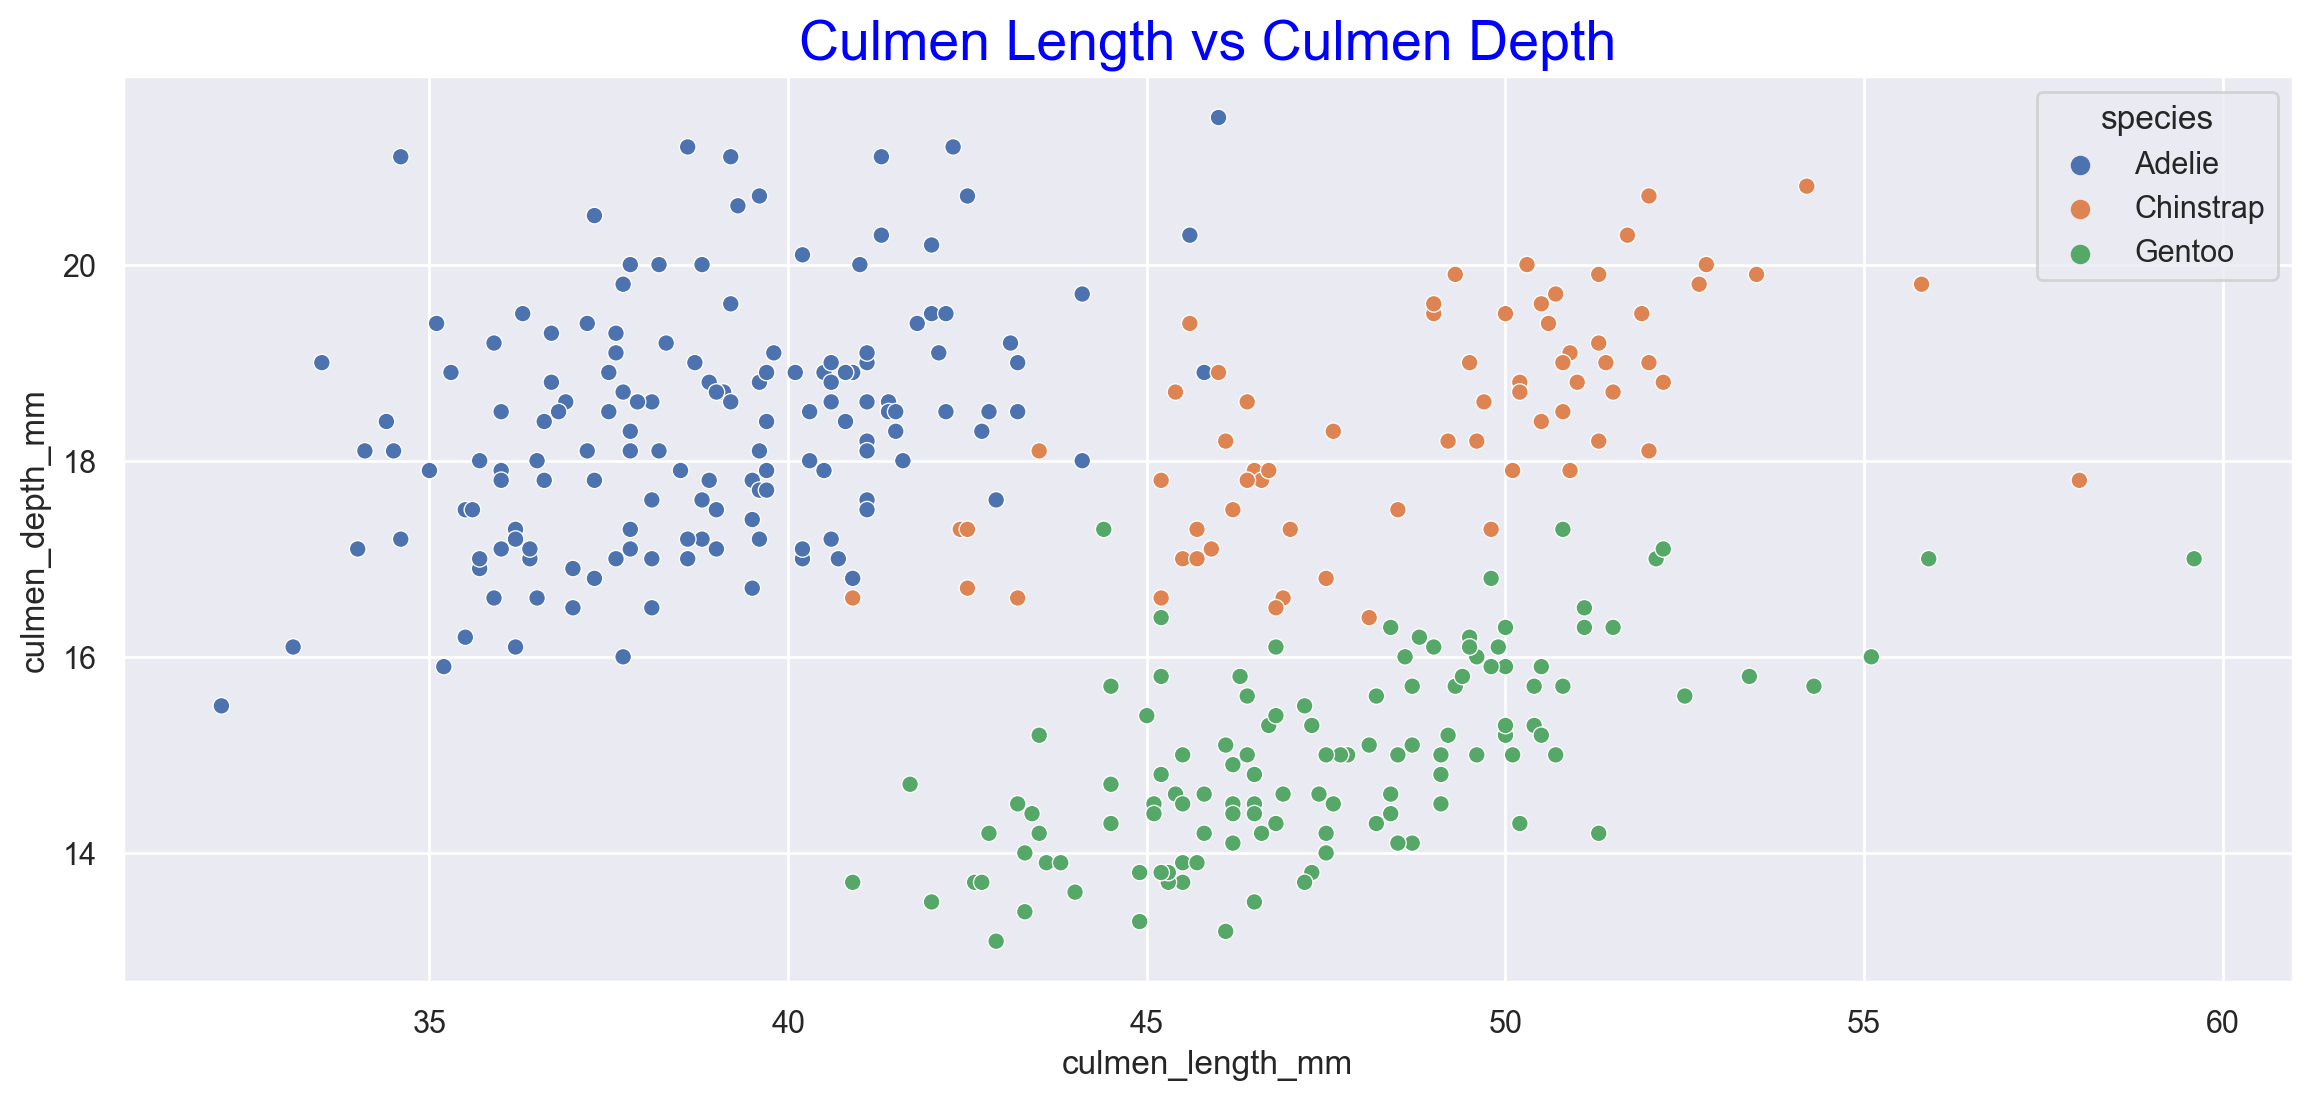

In [33]:
sns.set_theme()
sns.set(rc = {"figure.figsize": (14,6), "figure.dpi" : 200})
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=penguin, hue="species")
plt.title("Culmen Length vs Culmen Depth", size=20, color="blue")

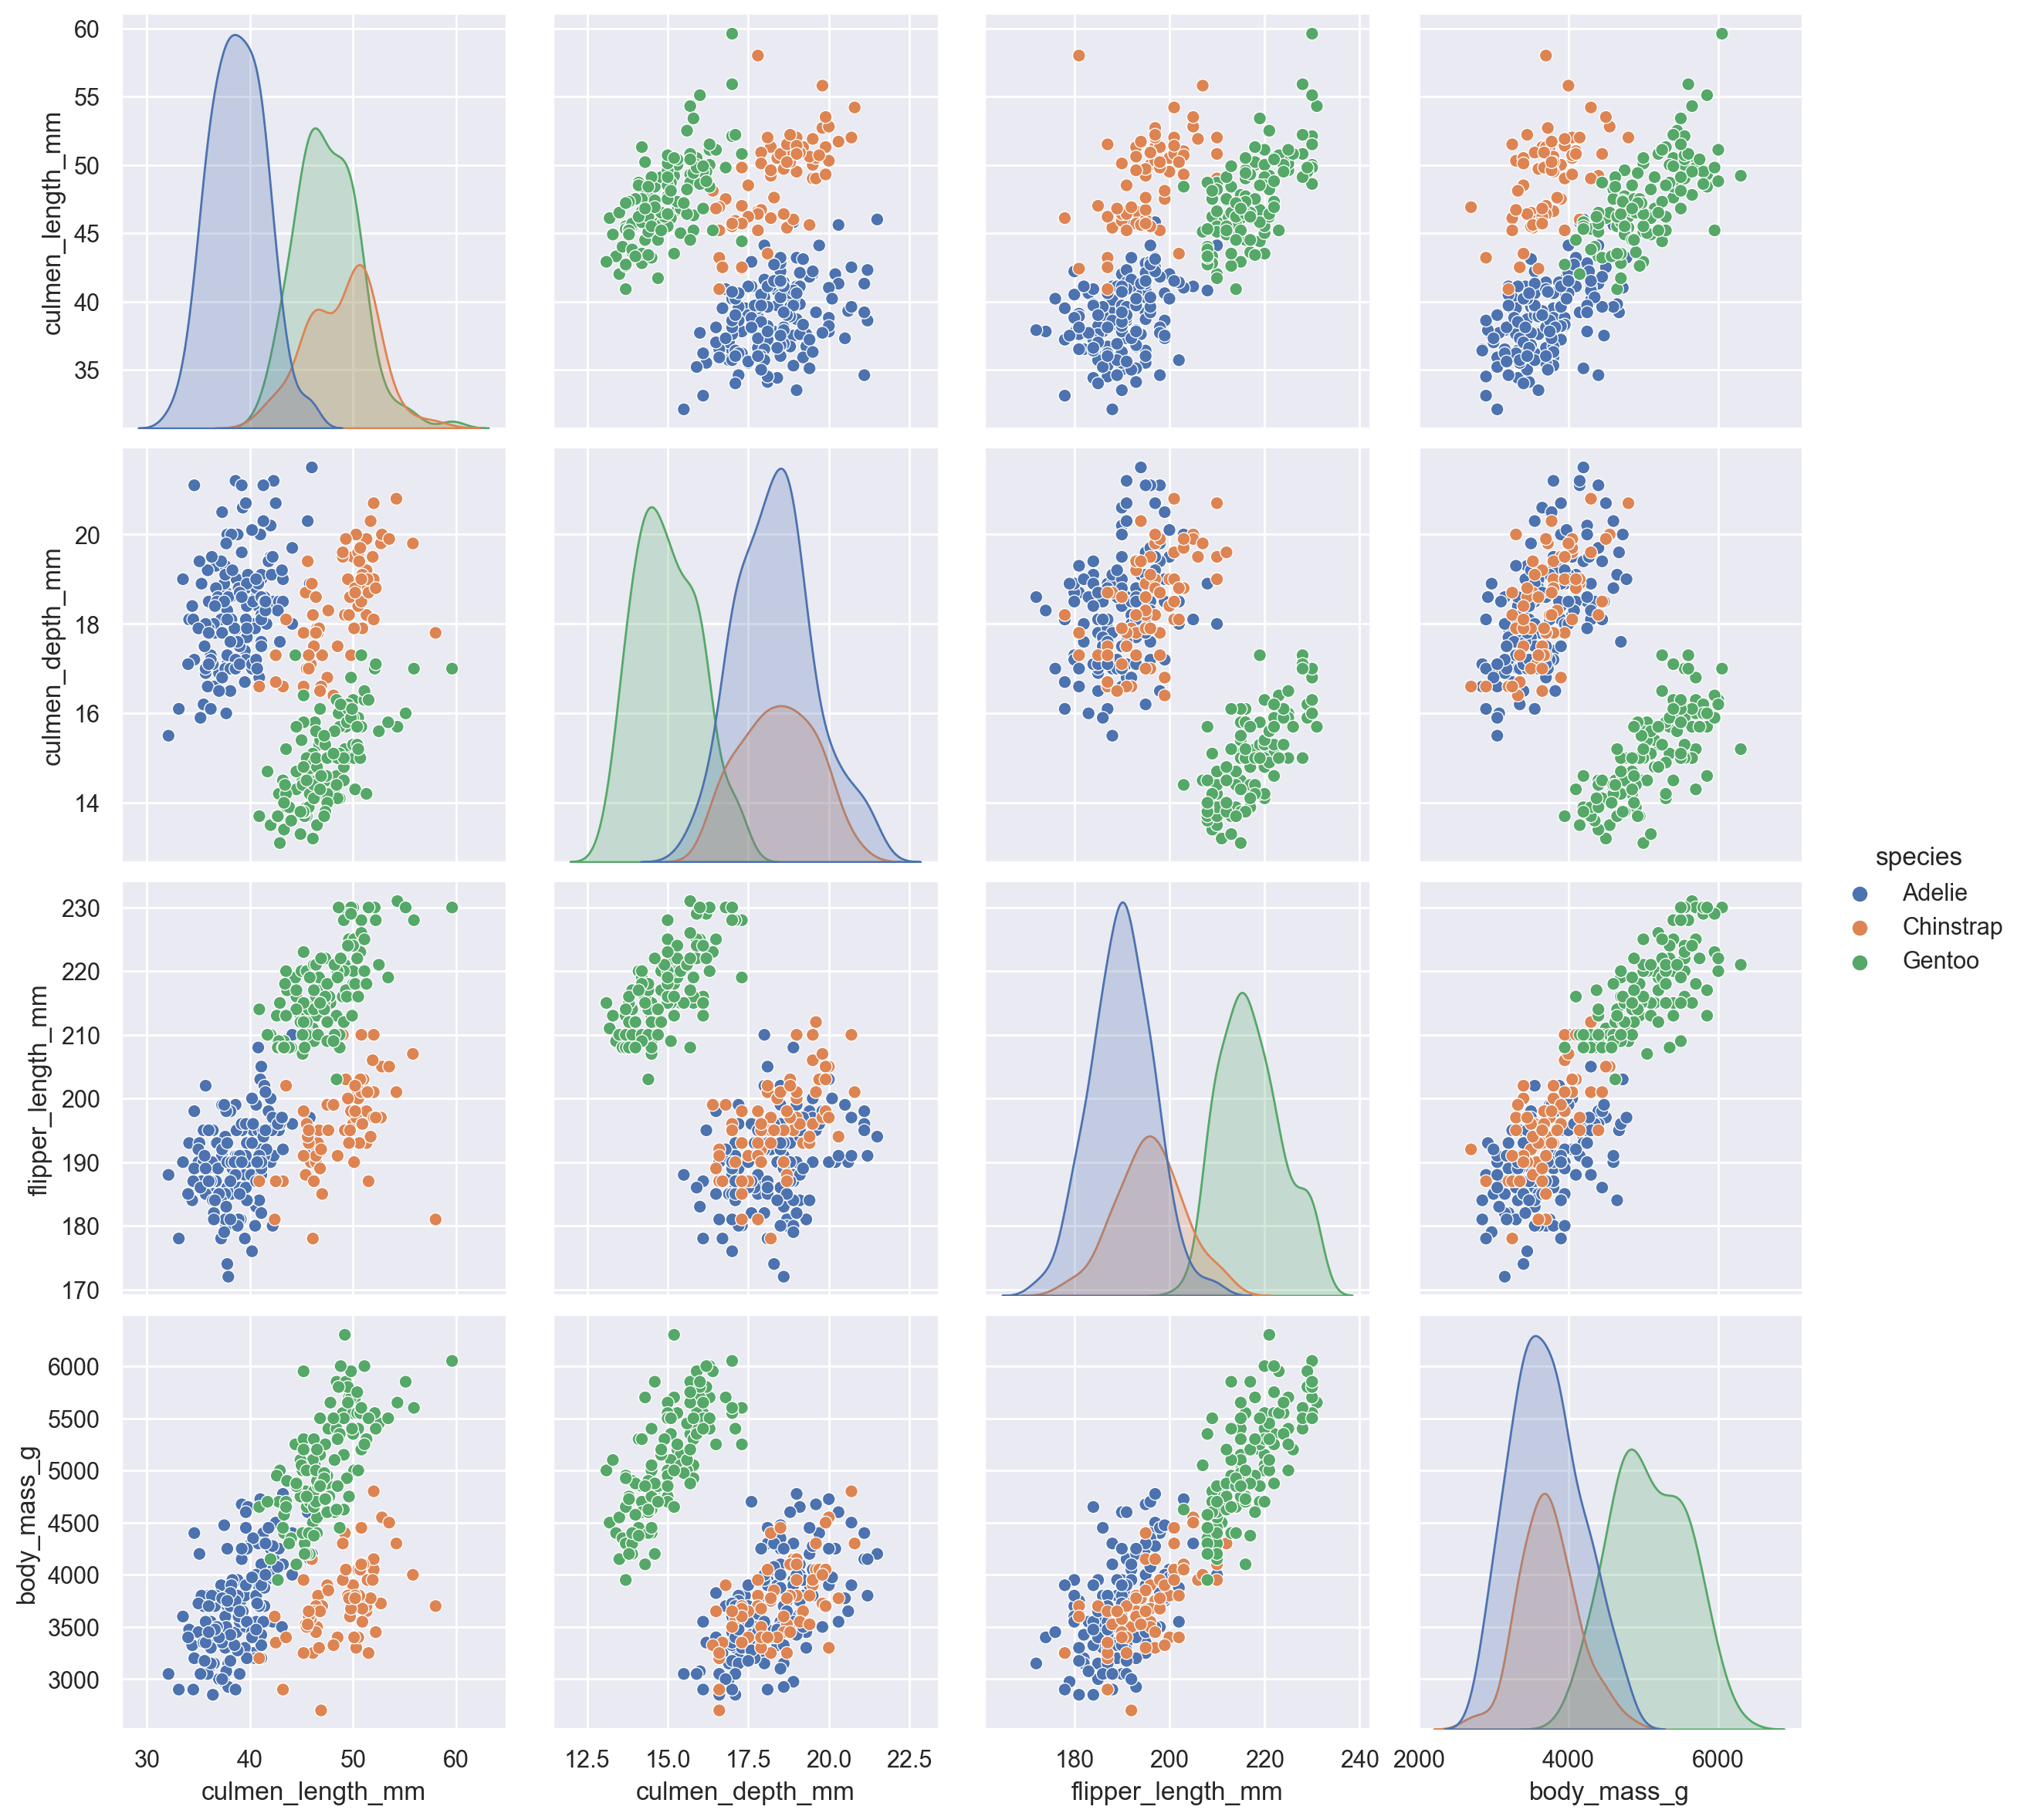

In [34]:
#See the pair of relations 
sns.pairplot(penguin, hue = "species", height=3)

Part 3: Preprocessing 

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [41]:
# encoding
le = LabelEncoder()
columns = ['species', 'island']
for col in columns:
    df[col]=le.fit_transform(df[col])
    df[col]=le.fit_transform(df[col])
    df['sex'] = df['sex'].replace(0, 2, inplace=True)
    df['sex'] = df['sex'].replace(['MALE','FEMALE'], [0,1], inplace=True)

In [43]:
# normalization
mms = MinMaxScaler()
columns = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
for col in columns:
    df[col] = mms.fit_transform(df[[col]])

In [48]:
# NaN values
df = df.fillna(0)

In [49]:
# X and y
X = df.drop(['species'], axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)


# saving
X.to_csv('../data/Data_X.csv')
y.to_csv('../data/Data_y.csv')
        
X_train_df = pd.DataFrame(X_train)
X_train_df.to_csv('../data/Train_Data_X.csv')
        
y_train_df = pd.DataFrame(y_train)
y_train_df.to_csv('../data/Train_Data_y.csv')
        
X_test_df = pd.DataFrame(X_test)
X_test_df.to_csv('../data/Test_Data_X.csv')
        
y_test_df = pd.DataFrame(y_test)
y_test_df.to_csv('../data/Test_Data_y.csv')

Part 4: Training 

In [50]:

from sklearn.gaussian_process.kernels import RBF

class Train:
    # takes in a features and attributes arrays
    def __init__(self):
        
        K = 1.0 * RBF(1.0)

        # X and y
        self.X = pd.read_csv('../data/Train_Data_X.csv', index_col=[0])
        self.y = pd.read_csv('../data/Train_Data_y.csv', index_col=[0])

        # Model
        self.model = sklearn.gaussian_process.GaussianProcessClassifier(kernel=K)

        # call
        self.trainModel()

    def trainModel(self):
        self.model.fit(self.X, self.y)
        pickle.dump(self.model, open('Model.pkl', 'wb'))

Part 5: Prediction

In [51]:

class Predict:

    def __init__(self):

        self.X_test = pd.read_csv('../data/Test_Data_X.csv', index_col=[0])

    def predictLabels(self):
        Model = pickle.load(open('Model.pkl', 'rb'))
        return Model.predict(self.X_test)

In [61]:

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

def main(data):

    # preprocess data
    #Preprocess(data)

    # develop and train model
    Train()

    # perform predictions + evaluation
    y_true = pd.read_csv('../data/Test_Data_y.csv', index_col=[0])
    y_pred = Predict().predictLabels()
    accuracy = metrics.accuracy_score(y_true, y_pred)
   
    cm = confusion_matrix(y_true, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{cm}')
    print('CLASSIFICATION REPORT\n')
    print(classification_report(y_test, y_pred))

if __name__ == '__main__':
    main('data.csv')

Accuracy: 0.7906976744186046
Confusion Matrix:
[[39  0  0]
 [ 2  0 16]
 [ 0  0 29]]
CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       0.00      0.00      0.00        18
           2       0.64      1.00      0.78        29

    accuracy                           0.79        86
   macro avg       0.53      0.67      0.59        86
weighted avg       0.65      0.79      0.71        86



In [69]:
sklearn_version = sklearn.__version__

print(sklearn_version)

1.1.2
